Week 2 of data science for business 
the CRISP-dm model

# Group Activity: Customer Churn Analysis
Explore factors that may influence customer churn in a retail environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load dataset
url = "https://raw.githubusercontent.com/Patrick0481/Data-science-for-business/refs/heads/main/in_class_customer_churn_dataset.csv?token=GHSAT0AAAAAADKNWND6XJSRJRWLOJIFTCE22GL4NXA"
df = pd.read_csv(url)
df.head()

,Customer_ID,Age,Gender,Region,Tenure_Months,Annual_Spend,Promo_Used,Customer_Service_Calls,Churned
0,1,56,Female,South,58,1492.43,1,2,0
1,2,69,Male,South,28,4567.46,1,0,1
2,3,46,Male,North,36,4211.45,1,1,1
3,4,32,Male,East,26,3210.62,1,1,0
4,5,60,Male,South,8,2084.80,1,3,1


In [21]:
# Step 1: Basic Info
print("Shape:", df.shape)
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (300, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             300 non-null    int64  
 1   Age                     300 non-null    int64  
 2   Gender                  300 non-null    object 
 3   Region                  300 non-null    object 
 4   Tenure_Months           300 non-null    int64  
 5   Annual_Spend            300 non-null    float64
 6   Promo_Used              300 non-null    int64  
 7   Customer_Service_Calls  300 non-null    int64  
 8   Churned                 300 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 21.2+ KB

Missing Values:
Customer_ID               0
Age                       0
Gender                    0
Region                    0
Tenure_Months             0
Annual_Spend              0
Promo_Used                0
Customer_Service_Call

In [5]:
# Step 2: Descriptive Stats
df.describe(include='all')

,Customer_ID,Age,Gender,Region,Tenure_Months,Annual_Spend,Promo_Used,Customer_Service_Calls,Churned
count,300.000000,300.000000,300,300,300.000000,300.000000,300.000000,300.000000,300.000000
unique,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,North,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,162,90,NaN,NaN,NaN,NaN,NaN
mean,150.500000,43.320000,NaN,NaN,30.283333,3599.773000,0.623333,1.916667,0.246667
std,86.746758,15.326686,NaN,NaN,17.282902,1069.768929,0.485360,1.324981,0.431791
min,1.000000,18.000000,NaN,NaN,1.000000,715.360000,0.000000,0.000000,0.000000
25%,75.750000,30.000000,NaN,NaN,16.000000,2861.690000,0.000000,1.000000,0.000000
50%,150.500000,43.500000,NaN,NaN,29.500000,3618.165000,1.000000,2.000000,0.000000
75%,225.250000,56.000000,NaN,NaN,47.000000,4321.292500,1.000000,3.000000,0.000000


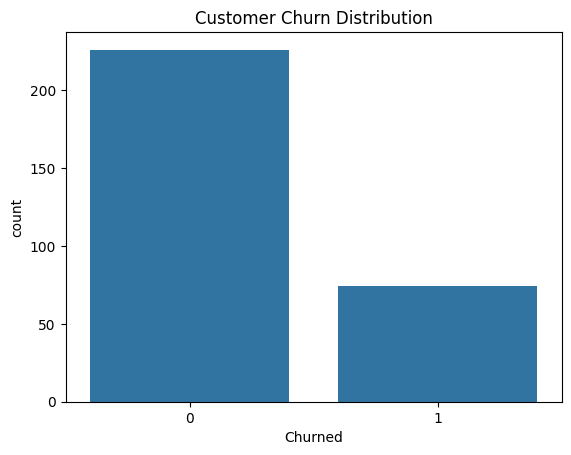

In [20]:
# Step 3: Churn Distribution
sns.countplot(x='Churned', data=df)
plt.title("Customer Churn Distribution")
plt.show()

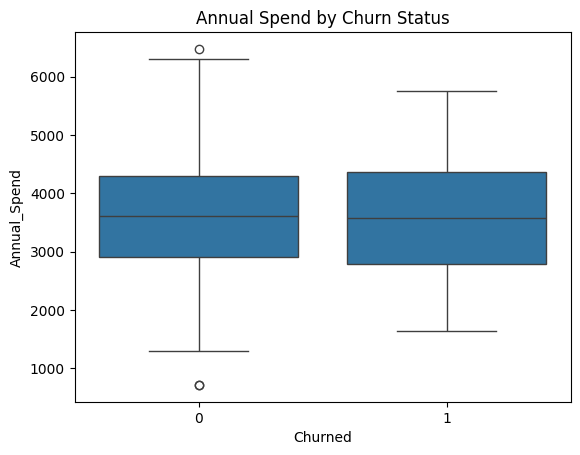

In [19]:
# Step 4: Annual Spend by Churn
sns.boxplot(x='Churned', y='Annual_Spend', data=df)
plt.title("Annual Spend by Churn Status")
plt.show()

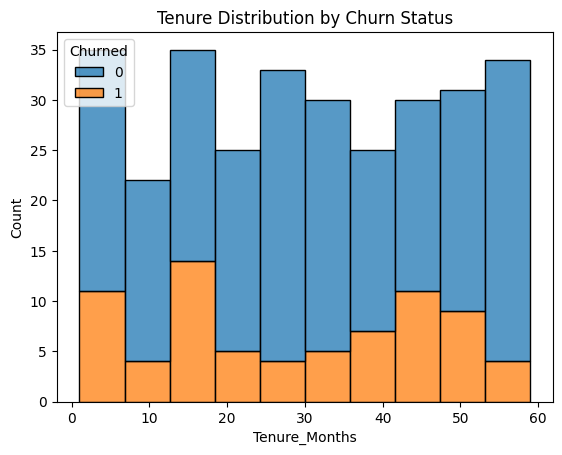

In [18]:
# Step 5: Tenure and Churn
sns.histplot(data=df, x='Tenure_Months', hue='Churned', multiple='stack')
plt.title("Tenure Distribution by Churn Status")
plt.show()

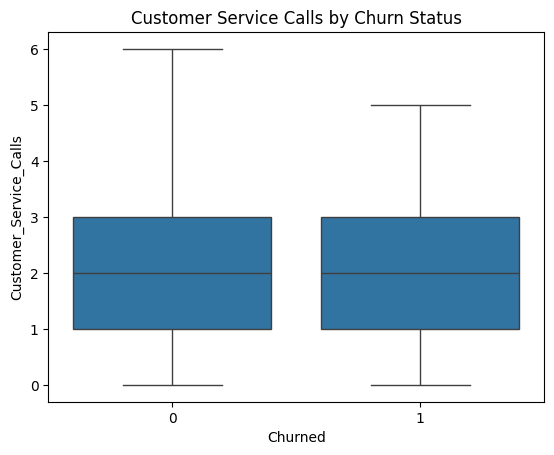

In [17]:
# Step 6: Customer Service Calls vs. Churn
sns.boxplot(x='Churned', y='Customer_Service_Calls', data=df)
plt.title("Customer Service Calls by Churn Status")
plt.show()

In [25]:
#Group by region: Avg Spend and Churn Rate
region_summary = df.groupby('Region').agg(
    Avg_Annual_Spend=('Annual_Spend', 'mean'),
    Churn_Rate=('Churned', 'mean'),
    Avg_Customer_Service_Calls=('Customer_Service_Calls', 'mean')
).reset_index()

print(region_summary)

  Region  Avg_Annual_Spend  Churn_Rate  Avg_Customer_Service_Calls
0   East       3576.807059    0.279412                    1.941176
1  North       3721.950111    0.222222                    1.644444
2  South       3254.192769    0.261538                    2.230769
3   West       3768.973766    0.233766                    1.948052


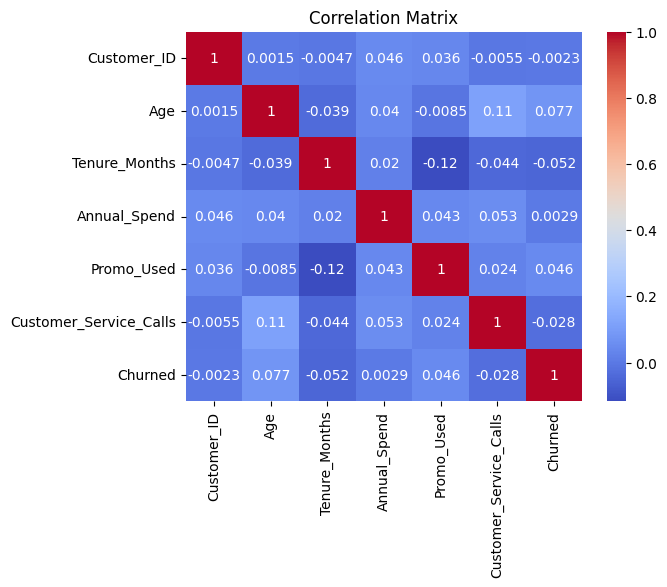

In [10]:
# Step 7: Correlation Matrix (Numerical Features)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### ✅ Challenge Prompts
- What patterns can you see?
- Which customers seem at higher risk of churn?
- What business actions would you recommend?